In [1]:
using DifferentialEquations, Plots, LaTeXStrings, DynamicalSystems, BenchmarkTools, LinearAlgebra, NLsolve

# The Lorentz system overview

Defining the system

Consider $x = (x, y,z)$:

$$ 
\begin{gather*}
\dot{x} = \sigma(y - x)\\ 
\dot{y} = x(\rho - z) - y \\ 
\dot{z} = xy - \beta z
\end{gather*}
$$

the Lorenz system, which has long been used for studying the interplay between predictability and chaos. We select with $\beta = 8/3$ and $\sigma = 10$ standard parameter settings, retaining $\rho$ as the bifurcation parameter.



┌ Info: Saved animation to /mnt/38BAB760BAB71978/git_repos/predicting-chaos-from-timeseries/src/lorenz_attractor.gif
└ @ Plots /home/syntaxerror/.julia/packages/Plots/Ec1L1/src/animation.jl:156


Plots.AnimatedGif("/mnt/38BAB760BAB71978/git_repos/predicting-chaos-from-timeseries/src/lorenz_attractor.gif")
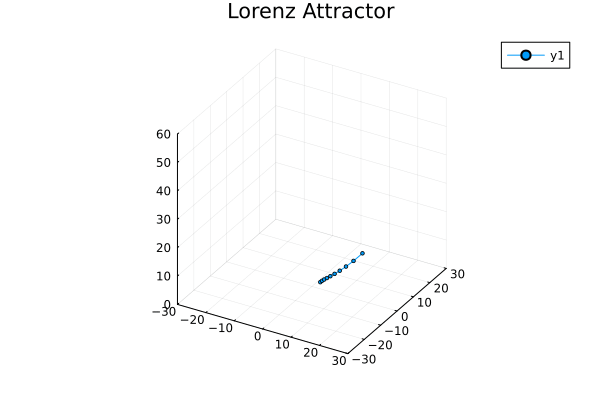

In [ ]:

attractor = Lorenz()

# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    marker = 2,
)

# Create an Animation object
anim = Animation()

# Build the animation by adding frames
for i = 1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
    if i % 10 == 0
        frame(anim, plt)
    end
end

# Save the animation as a GIF
gif(anim, "lorenz_attractor.gif")


In [ ]:
# Define the Lorenz system equations
function lorenz!(du, u, p, t)
    σ, ρ, β = p  # Parameters of the Lorenz system
    x, y, z = u  # Current state (x, y, z)
    du[1] = σ * (y - x)
    du[2] = x * (ρ - z) - y
    du[3] = x * y - β * z
end

# Parameters for the Lorenz system
σ = 10.0
ρ = 28.0
β = 8.0 / 3.0

# Initial state
u0 = [1.0, 1.0, 1.0]

# Time span (arbitrary for defining the system; use specific time spans when solving)
tspan = (0.0, 100.0)

# Create the continuous dynamical system
lorenz_system = ContinuousDynamicalSystem(lorenz!, u0, [σ, ρ, β])

# To simulate the system, use trajectory
dt = 0.01  # Time step for trajectory
steps = 500  # Number of steps
traj = trajectory(lorenz_system, steps; Δt = dt)


In [ ]:
plot(traj, vars=(1, 2, 3), legend=false, title="Lorenz Attractor",
    xlabel="x", ylabel="y", zlabel="z")